In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/global air pollution dataset.csv')

#Use only 200 entries in dataframe
data = data.head(200)

In [3]:
#column_to_drop = ['CO3', 'lat_gis', 'long_gis', 'mandal', 'HCO3', 'Cl', 'F', 'SO4', 'Na', 'K', 'Ca', 'Mg']
#data.drop(column_to_drop, axis=1, inplace=True)

In [4]:
data.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,70.420000,1.390000,36.800000,3.590000,67.535000
std,47.049462,1.083406,33.659394,5.527628,46.348784
min,17.000000,0.000000,0.000000,0.000000,6.000000
25%,41.000000,1.000000,19.000000,0.000000,37.000000
50%,55.000000,1.000000,29.000000,1.000000,54.500000
75%,80.250000,2.000000,39.000000,4.000000,79.250000
max,307.000000,5.000000,203.000000,36.000000,307.000000


In [5]:
data.shape

(200, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             200 non-null    object
 1   City                200 non-null    object
 2   AQI Value           200 non-null    int64 
 3   AQI Category        200 non-null    object
 4   CO AQI Value        200 non-null    int64 
 5   CO AQI Category     200 non-null    object
 6   Ozone AQI Value     200 non-null    int64 
 7   Ozone AQI Category  200 non-null    object
 8   NO2 AQI Value       200 non-null    int64 
 9   NO2 AQI Category    200 non-null    object
 10  PM2.5 AQI Value     200 non-null    int64 
 11  PM2.5 AQI Category  200 non-null    object
dtypes: int64(5), object(7)
memory usage: 18.9+ KB


In [7]:
data.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [8]:
data = data.dropna()

In [9]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [10]:
'''
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Country_Code'] = le.fit_transform(data['Country'])
data['Human Development Groups Code'] = le.fit_transform(data['Human Development Groups'])
data['UNDP Developing Regions Code'] = le.fit_transform(data['UNDP Developing Regions'])
'''
#data = data.drop(colums=['0'],inplace=True)

"\nfrom sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndata['Country_Code'] = le.fit_transform(data['Country'])\ndata['Human Development Groups Code'] = le.fit_transform(data['Human Development Groups'])\ndata['UNDP Developing Regions Code'] = le.fit_transform(data['UNDP Developing Regions'])\n"

In [11]:
#desired_column_order = ['Id', 'age','sex','Sex_Code','bmi','children','smoker','Smoker_Code','region','region_Code','charges']
#data = data.reindex(columns=desired_column_order)

In [12]:
data.shape

(200, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             200 non-null    object
 1   City                200 non-null    object
 2   AQI Value           200 non-null    int64 
 3   AQI Category        200 non-null    object
 4   CO AQI Value        200 non-null    int64 
 5   CO AQI Category     200 non-null    object
 6   Ozone AQI Value     200 non-null    int64 
 7   Ozone AQI Category  200 non-null    object
 8   NO2 AQI Value       200 non-null    int64 
 9   NO2 AQI Category    200 non-null    object
 10  PM2.5 AQI Value     200 non-null    int64 
 11  PM2.5 AQI Category  200 non-null    object
dtypes: int64(5), object(7)
memory usage: 18.9+ KB


In [14]:
column = data
count = column[column==0].count()
print(count)

Country                0
City                   0
AQI Value              0
AQI Category           0
CO AQI Value          28
CO AQI Category        0
Ozone AQI Value        1
Ozone AQI Category     0
NO2 AQI Value         56
NO2 AQI Category       0
PM2.5 AQI Value        0
PM2.5 AQI Category     0
dtype: int64


In [15]:
data.nunique()

Country                52
City                  200
AQI Value              93
AQI Category            6
CO AQI Value            6
CO AQI Category         1
Ozone AQI Value        72
Ozone AQI Category      5
NO2 AQI Value          22
NO2 AQI Category        1
PM2.5 AQI Value        97
PM2.5 AQI Category      6
dtype: int64

In [16]:
data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [17]:
data.corr()

<ipython-input-17-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
AQI Value,1.000000,0.677090,0.606084,0.140035,0.980769
CO AQI Value,0.677090,1.000000,0.438287,0.416180,0.642396
Ozone AQI Value,0.606084,0.438287,1.000000,-0.163197,0.504749
NO2 AQI Value,0.140035,0.416180,-0.163197,1.000000,0.163462
PM2.5 AQI Value,0.980769,0.642396,0.504749,0.163462,1.000000


In [18]:
random_values = np.random.rand(len(data))

data['CO AQI Value'] = data['CO AQI Value'] + random_values

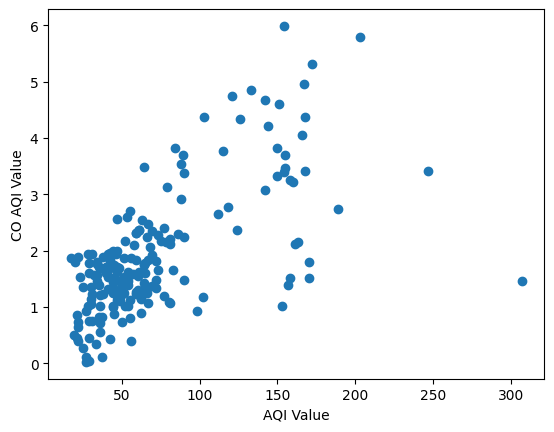

In [19]:
x = data['AQI Value']
y = data['CO AQI Value']
plt.xlabel("AQI Value")
plt.ylabel("CO AQI Value")
plt.plot(x,y,'o') #swarm plot

<Axes: xlabel='AQI Value', ylabel='CO AQI Value'>

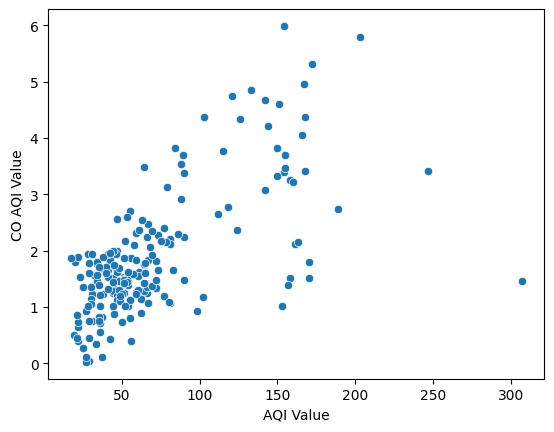

In [20]:
sns.scatterplot(x=x,y=y,data=data)

In [21]:
type(x)

pandas.core.series.Series

In [22]:
x.shape

(200,)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(pd.DataFrame(x))

In [24]:
x = x.reshape(200,1)

In [25]:
x.shape

(200, 1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

print(f'x training Dataset : {x_train.shape}')
print(f'y training Dataset : {y_train.shape}')
print(f'x testing Dataset : {x_test.shape}')
print(f'y tinging Dataset : {y_test.shape}')

x training Dataset : (150, 1)
y training Dataset : (150,)
x testing Dataset : (50, 1)
y tinging Dataset : (50,)


In [27]:
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [28]:
model.coef_

array([4.26421133])

In [29]:
model.intercept_

1.0758608656793645

In [30]:
y_pred = model.predict(x_test)
y_pred.shape

(50,)

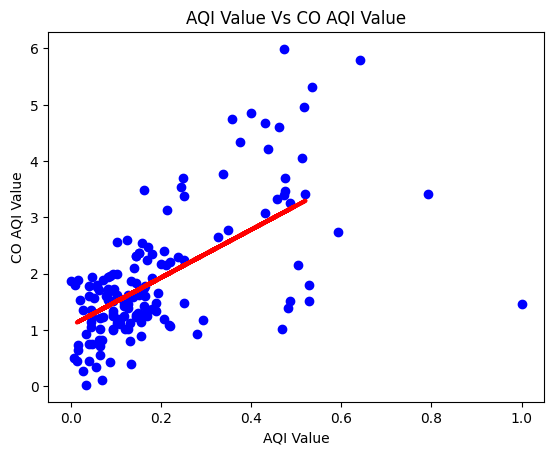

In [31]:
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=3)
plt.title("AQI Value Vs CO AQI Value")
plt.xlabel("AQI Value")
plt.ylabel("CO AQI Value")
plt.show()

<Axes: ylabel='CO AQI Value'>

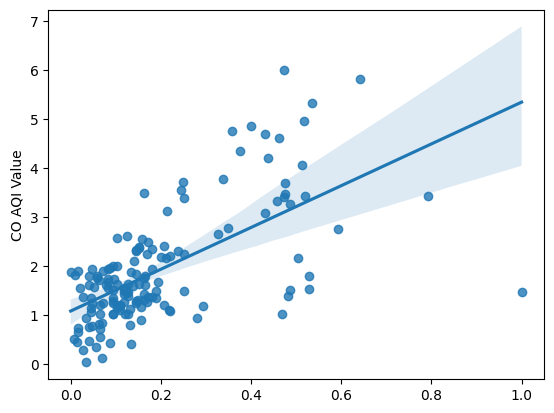

In [32]:
sns.regplot(data=data,x=x_train,y=y_train,)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'MAE : {mean_absolute_error(y_test,y_pred)}')
print(f'R-Sqaure : {r2_score(y_test,y_pred)}')

MSE : 0.4140044941382645
MAE : 0.47066439396951215
R-Sqaure : 0.5111608481318362


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

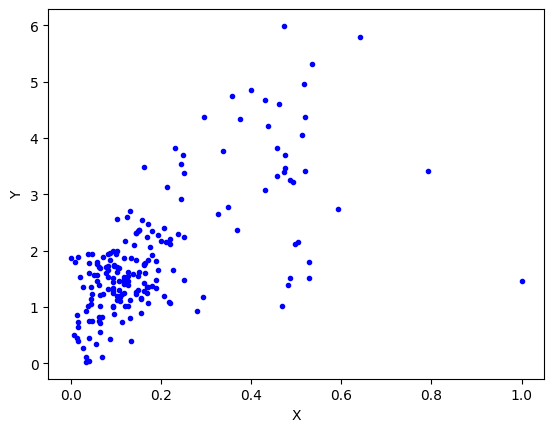

In [35]:
#X = 6 * np.random.rand(200,1) - 3
#y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200,1)
plt.plot(x,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.40782531777158515


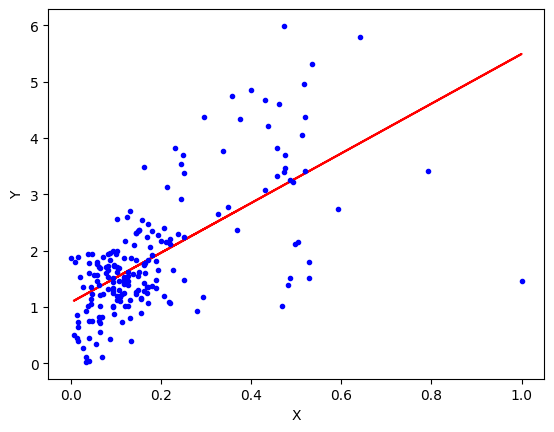

In [37]:
plt.plot(x_train, lr.predict(x_train),color='r')
plt.plot(x,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [38]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans,y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test,y_pred))

0.35200967277461215


In [39]:
print(lr.coef_)
print(lr.intercept_)

[ 0.         10.13583397 -8.45370234]
0.5364099832697393


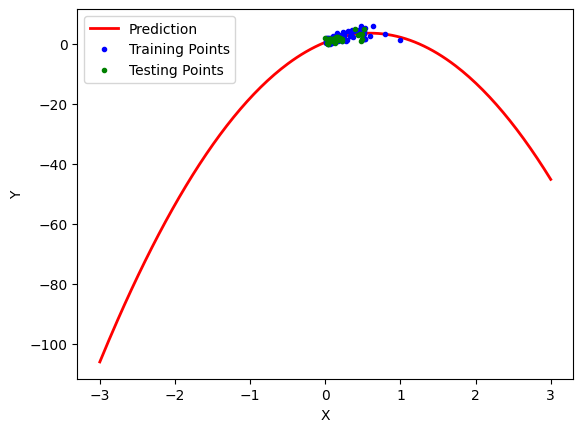

In [40]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label='Prediction')
plt.plot(x_train,y_train,'b.',label='Training Points')
plt.plot(x_test,y_test,'g.',label='Testing Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

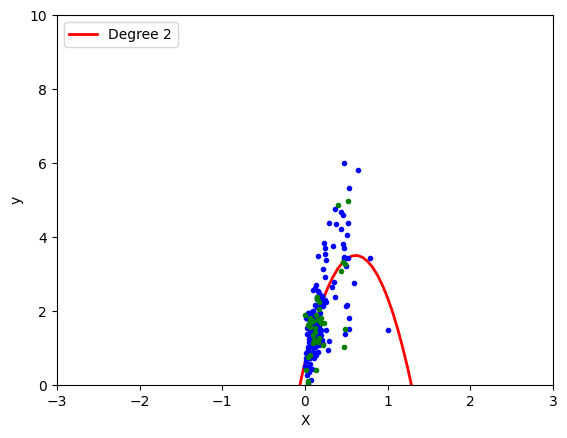

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([("poly_features", polybig_features),("std_scaler", std_scaler),("lin_reg", lin_reg),])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

polynomial_regression(2)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(f'MSE : {mean_squared_error(y_test,y_pred)}')
print(f'MAE : {mean_absolute_error(y_test,y_pred)}')
print(f'R-Sqaure : {r2_score(y_test,y_pred)}')

MSE : 0.6707969396520813
MAE : 0.616258253200851
R-Sqaure : 0.35200967277461215
